# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [2]:
image = imread('data/image.jpg')

Analizala

In [3]:
image

array([[[37, 34, 45],
        [37, 34, 45],
        [37, 33, 47],
        ...,
        [10, 10, 12],
        [10, 10, 12],
        [10, 10, 12]],

       [[37, 34, 45],
        [37, 33, 47],
        [37, 33, 47],
        ...,
        [10, 10, 12],
        [10, 10, 12],
        [10, 10, 12]],

       [[37, 33, 47],
        [37, 33, 47],
        [38, 34, 48],
        ...,
        [10, 10, 12],
        [10, 10, 12],
        [10, 10, 12]],

       ...,

       [[14, 12, 17],
        [14, 12, 17],
        [14, 12, 17],
        ...,
        [10,  8, 11],
        [10,  8, 11],
        [10,  8, 11]],

       [[14, 12, 17],
        [14, 12, 17],
        [14, 12, 17],
        ...,
        [10,  8, 11],
        [10,  8, 11],
        [10,  8, 11]],

       [[14, 12, 17],
        [15, 13, 18],
        [15, 13, 18],
        ...,
        [10,  8, 11],
        [10,  8, 11],
        [10,  8, 11]]], dtype=uint8)

Muestra la imagen para ver que se ha cargado bien

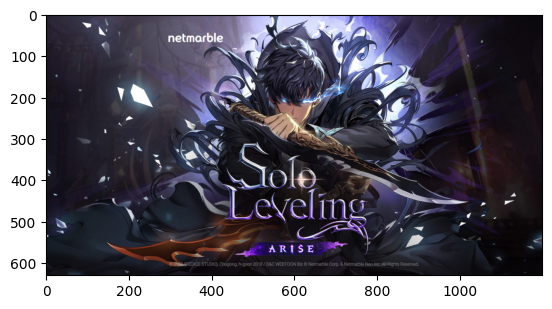

In [4]:
plt.imshow(image);

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [5]:
(h,w,c)= image.shape

In [6]:
image2d = image.reshape(h*w,c)
image2d

array([[37, 34, 45],
       [37, 34, 45],
       [37, 33, 47],
       ...,
       [10,  8, 11],
       [10,  8, 11],
       [10,  8, 11]], dtype=uint8)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [7]:
from sklearn.cluster import KMeans

In [8]:
#Determinamos número de K
k = 5
#Creamos modelo
model_kmeans = KMeans(n_clusters=k, random_state=42)

In [9]:
#Entrenamos y predecimos modelo
labels = model_kmeans.fit_predict(image2d)


In [10]:
labels

array([3, 3, 3, ..., 1, 1, 1])

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [11]:
#Centroides
centroides = np.round(model_kmeans.cluster_centers_.astype(int),2)
centroides

array([[ 86,  81, 109],
       [ 23,  19,  26],
       [216, 220, 242],
       [ 48,  44,  61],
       [140, 134, 175]])

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [12]:
#Volvemos a separar la imagen en alto, ancho y color
imagen = np.reshape(centroides[labels],(h,w,c))

#### 7. Imprime y guarda en tu ordenador la imagen resultante

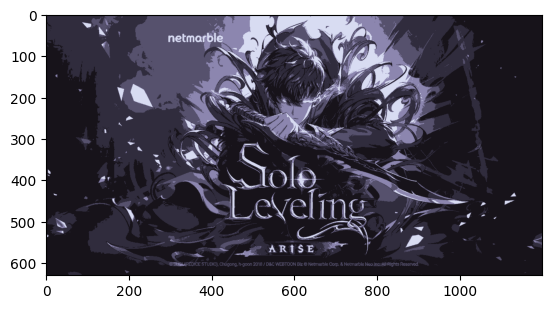

In [13]:
plt.imshow(imagen);

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [14]:
def show_image(image, num_colors=int):
    image = plt.imread(image) #Cargamos imagen
    (h,w,c)= image.shape #dimendiones imagen
    image2d = image.reshape(h*w,c) #convertir 2D
    model_kmeans = KMeans(n_clusters=num_colors, random_state=42) #generar modelo
    labels = model_kmeans.fit_predict(image2d) #entrenar y predecir
    centroides = np.round(model_kmeans.cluster_centers_.astype(int),2) #sustituimos valor por su centroide
    imagen_clust = np.reshape(centroides[labels],(h,w,c)) # modificamos nuevamente la estructura de la imagen a 3D
    answer = input('Para guardar imagen escriba "save". Para mostrar imagen escriba"show"')
    if answer == 'save':
        plt.savefig('data/image_lydia.png')
    if answer == 'show':
        plt.imshow(imagen_clust);
    else:
        print(f'Lea de nuevo las instrucciones, por favor.')

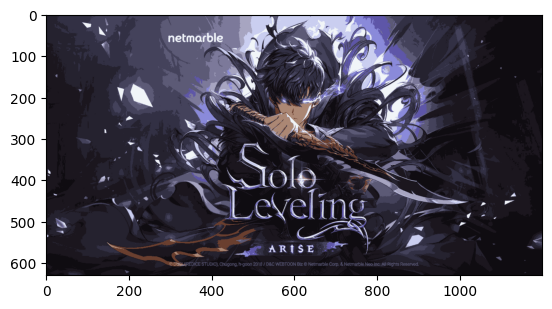

In [15]:
show_image('data/image.jpg', num_colors=14)